In [ ]:
import tensorflow as tf #딥러닝을 위한 오픈소스 라이브러리 불러오기
print("TensorFlow version: ",tf.__version__) #탠서 플로우 버전 출력

TensorFlow version:  2.15.0


In [ ]:
mnist=tf.keras.datasets.mnist
#mnist 데이터셋 불러오기
(x_train, y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0

In [ ]:
x_train.shape, x_test.shape,y_test.shape
#각각의 값 출력하기

((60000, 28, 28), (10000, 28, 28), (10000,))

In [ ]:
#4개로 구성된 신경
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), #입력층, 픽셀, 1차원으로 펼치기
    tf.keras.layers.Dense(128,activation='relu'), #가중치계산레이어, 1번째 레이어에서 오는 값을 128개의 값으로 인코딩, 활성화함수 relu사용
    tf.keras.layers.Dropout(0.2), #20%무시하기, 무시된 값은 4번째 레이어로 넘어감
    tf.keras.layers.Dense(10,activation='softmax') #숫자가 10개, 소프트맥스=확률계산(0~1로 표현)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

array([[0.06818219, 0.07587983, 0.21139733, 0.07948262, 0.03133196,
        0.06779254, 0.05521732, 0.08271503, 0.2077027 , 0.12029854]],
      dtype=float32)

In [ ]:
predictions.shape

(1, 10)

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) #훈련용 손실 함수 정의
loss_fn(y_train[:1], predictions).numpy()#올바른 클래스 확신하는 경우 손실은 0

2.3365526

In [ ]:
#Keras Model.compile사용하여 모델 구성하고 컴파일
model.compile(optimizer='adam', #최적화 함수 adam사용
              loss=loss_fn, #오차함수(얖에서 정의한 것으로 설정)
              metrics=['accuracy']) #매개변수를 accuracy로 설정하여 평가할 메트릭 지정

In [ ]:
model.fit(x_train, y_train, epochs=5) #입력데이터, 출력데이터, 반복횟수

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 7s 3ms/step - loss: 0.2979 - accuracy: 0.9131
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1430 - accuracy: 0.9575
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1064 - accuracy: 0.9684
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0870 - accuracy: 0.9733
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0751 - accuracy: 0.9766


In [ ]:
model.evaluate(x_test,  y_test, verbose=2) #모델 평가하기 / 데이터셋 지정, 손실값, 정확

313/313 - 1s - loss: 0.0743 - accuracy: 0.9775 - 704ms/epoch - 2ms/step


[0.07426554709672928, 0.9775000214576721]

In [ ]:
path="/content/drive/MyDrive/0-9" #파일 불러오기

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [ ]:
# 데이터 불러오기
dataset = tf.keras.utils.image_dataset_from_directory(path,
                                                      shuffle=True,
                                                        batch_size=10,
                                                        image_size=(160, 160))

Found 426 files belonging to 10 classes.


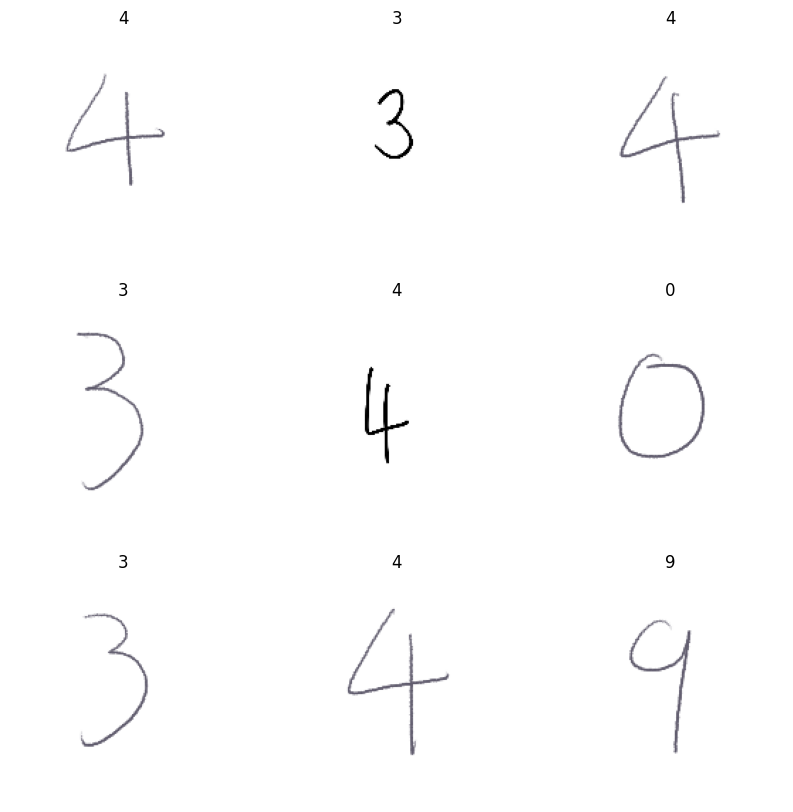

In [ ]:
# 라벨 확인하기
class_names = dataset.class_names

plt.figure(figsize=(10, 10)) #이미지의 사이즈를 정해주기
for images, labels in dataset.take(1): #train_ds에서 하나의 배치를 가져오기
    for i in range(9): #9장의 의미지를 3*3형태로 나타내기
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
# 배치 크기로 나누기
batches = tf.data.experimental.cardinality(dataset)
train_dataset = dataset.take(batches * 4 // 5)
test_dataset = dataset.skip(batches * 4 // 5)

print(tf.data.experimental.cardinality(train_dataset))
print(tf.data.experimental.cardinality(test_dataset))

tf.Tensor(34, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


In [ ]:
# 버퍼링된 프리페치로 I/O 차단 없이 디스크에서 이미지 로드(성능향상)
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

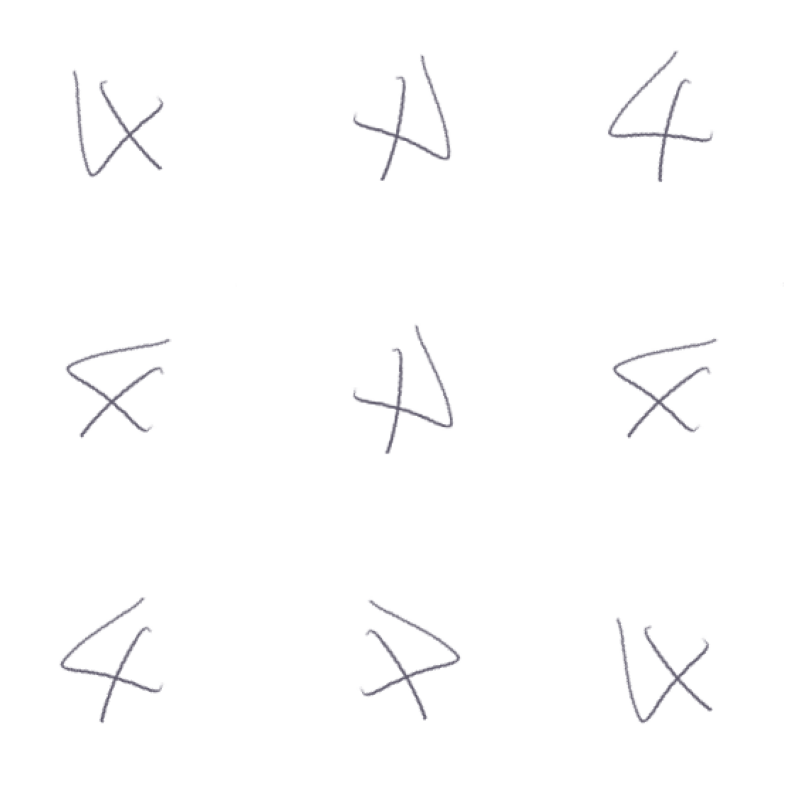

In [ ]:
# 데이터 증강 사용
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
])

for image, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]

    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

In [ ]:
# 픽셀값 재조정 -1 ~ 1 의 값, 모델에 맞게 사용
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [ ]:
# 전이학습의 기본 모델 설정
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = (160, 160) + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.summary

<bound method Model.summary of <keras.src.engine.functional.Functional object at 0x7e56731a7970>>

In [ ]:
# 베이스 모델로의 변환 확인
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(10, 5, 5, 1280)


In [ ]:
# 베이스 모델 학습 하지 않음
base_model.trainable = False

In [ ]:
# 입력 이미지를 모델에 맞게 변환
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(10, 1280)


In [ ]:
# 모델의 출력부 확인
prediction_layer = tf.keras.layers.Dense(10)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(10, 10)


In [ ]:
# 모델 생성
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
# 모델 컴파일
base_learning_rate = 0.0001 #학습률 설정
#compile()을 통해 학습할 수 있는 형태로 변환
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate), #최적화함수
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #손실함수
              metrics=['accuracy']) #모델 성능 평가하는 척도(정확도)

In [ ]:
model.summary() #이 메소드 사용시 네트워크의 모든 레이어를 볼 수 있다.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 160, 160, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 160, 160, 3)       0         
 da)                                                             
                                                                 
 mobilenetv2_1.00_160 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                             

In [ ]:
# 모델의 학습 가능 매개변수 확인
len(model.trainable_variables)

2

In [ ]:
#모델 훈련시키기
initial_epochs = 10

# 10 학습 후 결과
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=test_dataset)

Epoch 1/10
34/34 [==============================] - 50s 1s/step - loss: 2.4951 - accuracy: 0.1471 - val_loss: 2.1468 - val_accuracy: 0.2093
Epoch 2/10
34/34 [==============================] - 8s 208ms/step - loss: 2.1641 - accuracy: 0.2206 - val_loss: 1.8377 - val_accuracy: 0.3605
Epoch 3/10
34/34 [==============================] - 10s 264ms/step - loss: 1.9089 - accuracy: 0.3265 - val_loss: 1.7018 - val_accuracy: 0.3837
Epoch 4/10
34/34 [==============================] - 9s 250ms/step - loss: 1.6939 - accuracy: 0.4118 - val_loss: 1.5399 - val_accuracy: 0.4884
Epoch 5/10
34/34 [==============================] - 8s 205ms/step - loss: 1.5684 - accuracy: 0.5059 - val_loss: 1.3586 - val_accuracy: 0.5814
Epoch 6/10
34/34 [==============================] - 10s 271ms/step - loss: 1.4508 - accuracy: 0.5559 - val_loss: 1.2902 - val_accuracy: 0.6512
Epoch 7/10
34/34 [==============================] - 8s 219ms/step - loss: 1.2740 - accuracy: 0.5971 - val_loss: 1.1420 - val_accuracy: 0.7558
Epoch 

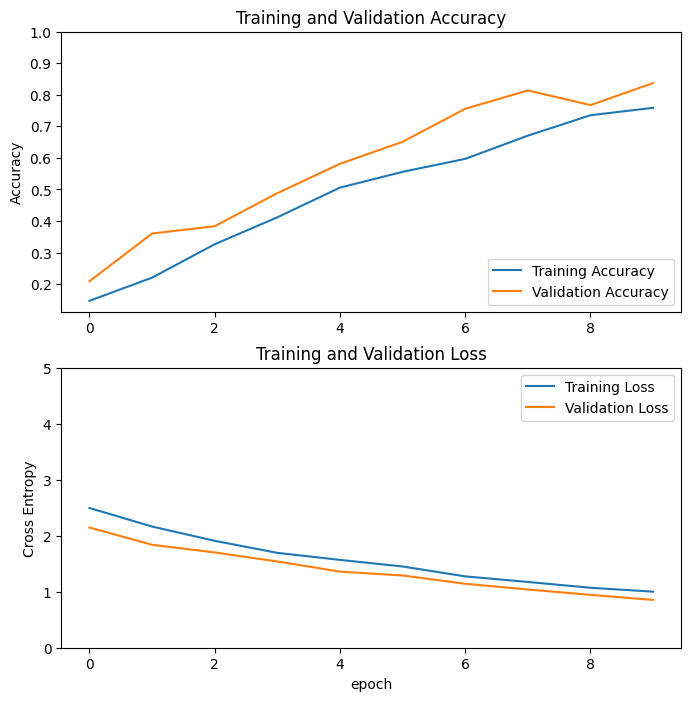

In [ ]:
#훈련 결과 시각화 하
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, 5.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# 모델 미세 조정
base_model.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

Number of layers in the base model:  154


In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 160, 160, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 160, 160, 3)       0         
 da)                                                             
                                                                 
 mobilenetv2_1.00_160 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                             

In [ ]:
len(model.trainable_variables)

56

In [ ]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=test_dataset)

Epoch 10/20
34/34 [==============================] - 20s 326ms/step - loss: 0.6655 - accuracy: 0.8029 - val_loss: 0.4345 - val_accuracy: 0.8721
Epoch 11/20
34/34 [==============================] - 14s 410ms/step - loss: 0.3381 - accuracy: 0.9324 - val_loss: 0.1923 - val_accuracy: 1.0000
Epoch 12/20
34/34 [==============================] - 9s 218ms/step - loss: 0.3035 - accuracy: 0.9235 - val_loss: 0.2146 - val_accuracy: 0.9535
Epoch 13/20
34/34 [==============================] - 9s 262ms/step - loss: 0.2525 - accuracy: 0.9176 - val_loss: 0.1278 - val_accuracy: 1.0000
Epoch 14/20
34/34 [==============================] - 8s 209ms/step - loss: 0.2080 - accuracy: 0.9412 - val_loss: 0.1266 - val_accuracy: 0.9767
Epoch 15/20
34/34 [==============================] - 9s 237ms/step - loss: 0.1636 - accuracy: 0.9441 - val_loss: 0.0913 - val_accuracy: 0.9884
Epoch 16/20
34/34 [==============================] - 9s 258ms/step - loss: 0.1177 - accuracy: 0.9706 - val_loss: 0.0514 - val_accuracy: 1.00

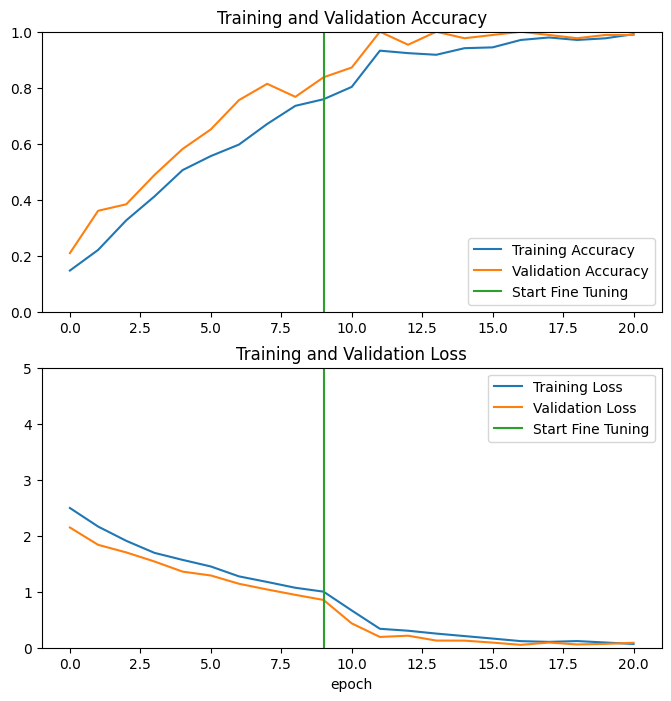

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 5.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(train_dataset)
print('Train accuracy :', accuracy)

loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

34/34 [==============================] - 6s 146ms/step - loss: 0.0736 - accuracy: 0.9853
Train accuracy : 0.9852941036224365
9/9 [==============================] - 4s 13ms/step - loss: 0.0782 - accuracy: 0.9884
Test accuracy : 0.9883720874786377


1/1 [==============================] - 1s 858ms/step


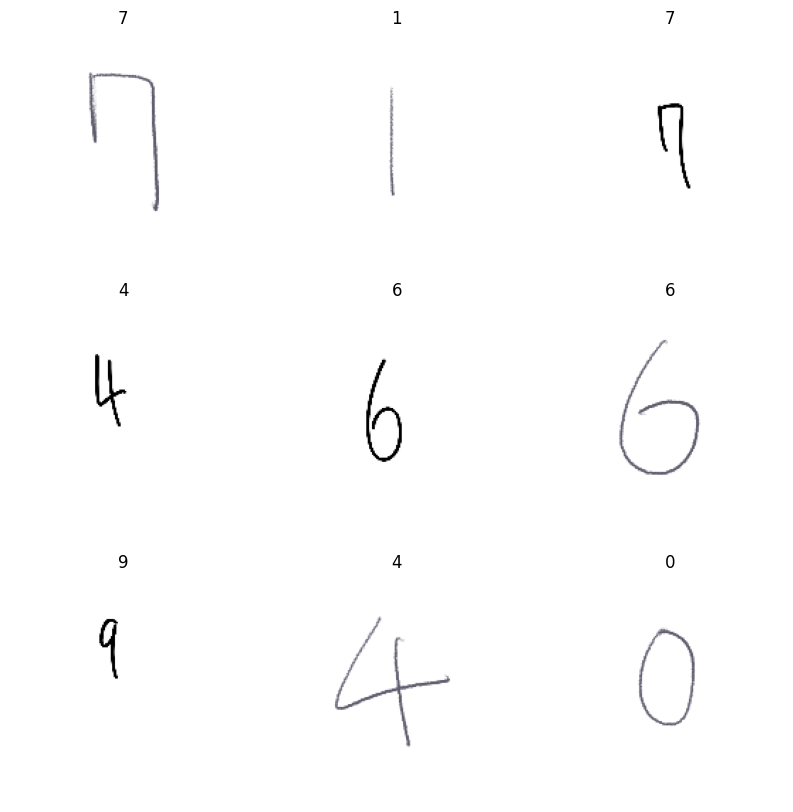

In [ ]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict(image_batch)

label = predictions.argmax(axis=1)

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title(label[i])
    plt.axis("off")